## Final Project Submission

Please fill out:
* Student name: Wesley Ochiel Owino 
* Student pace: Full time 
* Scheduled project review date/time: 
* Instructor name: Mark tiba 
* Blog post URL:


In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


C:\Users\Nicholas owino\AppData\Local\Temp\ipykernel_11704\275382908.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# function to check null values
def check_null(df):
    return df.isna().sum()

In [7]:
check_null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# function to calculate percentage of null values
def miss_percent(df,col):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [9]:
# function to calculate percentage of null values
def miss_percent(df,col):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [10]:
df['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [11]:
# function to replace null with a specificied value
def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [12]:
replace_nan(df,'yr_renovated',0)

In [13]:
df.duplicated().any()

False

In [14]:
#replacing the null values with zero
replace_nan(df,'waterfront', 0)

In [15]:
#replacing the null values with zero
replace_nan(df,'view', 0)

In [17]:
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [16]:
check_null(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Date has dtype as object therefore we split month and date date to get discrete values

In [18]:
# function to change data type to datetime
def change_to_datetime(df, col):
    ''' Changes column to DateTime object'''
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [19]:
change_to_datetime(df, 'date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [22]:
df_numeric = df.select_dtypes(include=[np.number])
df_corr = df_numeric.corr().abs()




In [23]:
df.drop(['id','date'], axis=1, inplace=True )

In [25]:
print(df['price'].dtype)

float64


In [26]:
non_numeric_values = df[~df['price'].apply(lambda x: isinstance(x, (int, float)))]['price'].unique()
print(non_numeric_values)


[]


In [27]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [28]:
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)
df['bathrooms']

0        1
1        3
2        1
3        3
4        2
        ..
21592    3
21593    3
21594    1
21595    3
21596    1
Name: bathrooms, Length: 21597, dtype: int32

In [29]:
df['waterfront'].value_counts()

waterfront
NO     19075
0       2376
YES      146
Name: count, dtype: int64

In [30]:
# function to replace a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [31]:
# changing YES to  1
substitute(df,'waterfront','YES',1)

# changing NO to  0
substitute(df, 'waterfront', 'NO', 0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  int32  
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [33]:
df['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0               63
Name: count, dtype: int64

In [35]:
substitute(df,'view',['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],[0,1,2,3,4])

In [36]:
df['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [37]:
substitute(df,'condition',['Poor','Fair','Average','Good','Very Good'],[1,2,3,4,5])

In [38]:
df['grade']

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [39]:
substitute(df,'grade',['7 Average','8 Good','9 Better','6 Low Average','10 Very Good','11 Excellent',
                      '5 Fair','12 Luxury','4 Low','13 Mansion','3 Poor'], [7,8,9,6,10,11,5,12,4,13,3])

In [40]:
substitute(df, 'sqft_basement', '?', 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [41]:
#q1 - (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  int32  
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [43]:
X = df[['sqft_living']]
y = df['price']

In [44]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:09:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [45]:
X_baseline = df.drop(['price'], axis=1)

In [46]:
multiple_model = sm.OLS(y, sm.add_constant(X_baseline))
multiple_model_results = multiple_model.fit()
print(multiple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2778.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:10:39   Log-Likelihood:            -2.9444e+05
No. Observations:               21597   AIC:                         5.889e+05
Df Residuals:                   21578   BIC:                         5.891e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.984e+06   2.94e+06      2.037

simple linear correlation for grade

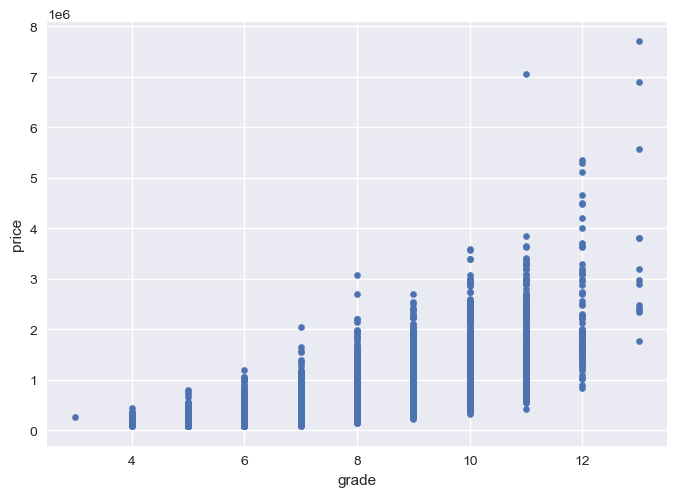

In [47]:
# plot a scatter plot to check for corrinality.
df.plot.scatter(x="grade", y= "price");

From the graphicah representation this shows that grade is a cartegorical variable. we check for correlation with price

In [48]:
# Correlation value.
df["price"].corr(df["grade"])

0.6679507713876465

The correlation coefficent shows that there is a positive relationship between the two variables.

In [50]:
print(grade_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:15:11   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.0

.The model is statistically significant overall, with an F-statistic p-value well below 0.05
.The model explains about 45% of the variance in price
.The model coefficient grade is all statistically significant, with t-statistic p-values well below 0.05
.For each increase of 1 grdae of the house, we see an associated increase in price of about 2 dollars.
.If the grade of the house is 0, we would expect a decrease in price of about 1 dollar. unrealist.

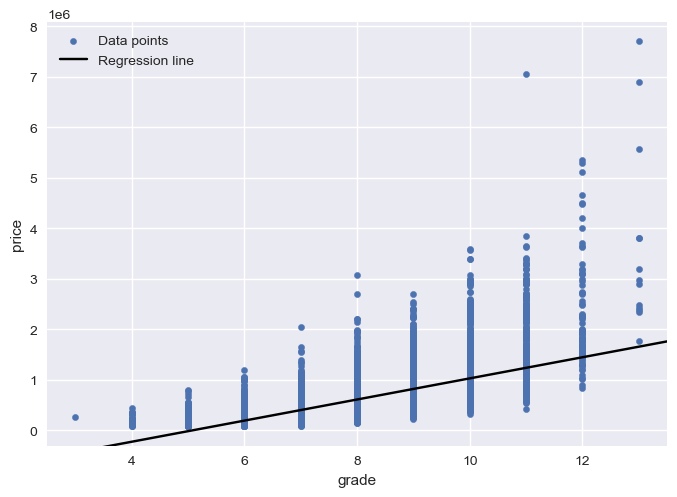

In [51]:
# plotting a regression for simple linear regression.
fig, ax = plt.subplots()
df.plot.scatter(x="grade", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=grade_results, label="Regression line", ax=ax, color="black")
ax.legend();

Simple linear on bedreooms

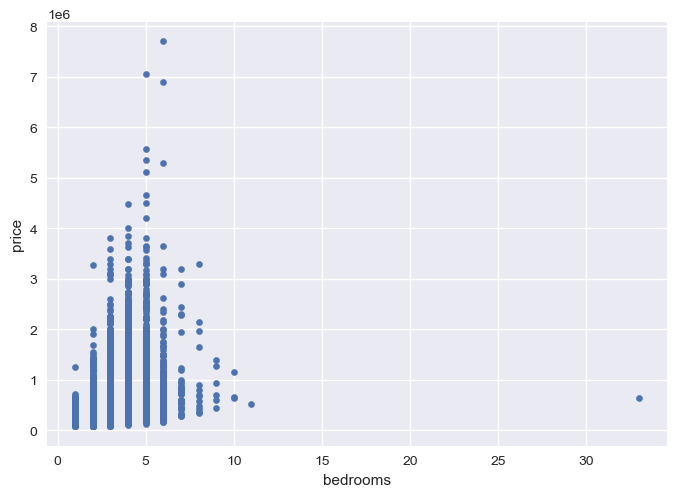

In [52]:
#plot a scatter plot to check for corrinality.
df.plot.scatter(x="bedrooms", y= "price");

In [53]:
# Correlation value.
df["price"].corr(df["bedrooms"])

0.30878747195653244

From the graph the data shows that its is a cartegorical variable and it has a poor correration coeeficient of 31% to price.

In [56]:
print(grade_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:21:18   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.0

The model is statistically siginificant since it has p value is below 0.05.

The model coeffient are also statistically siginificant with the p value below 0.05.

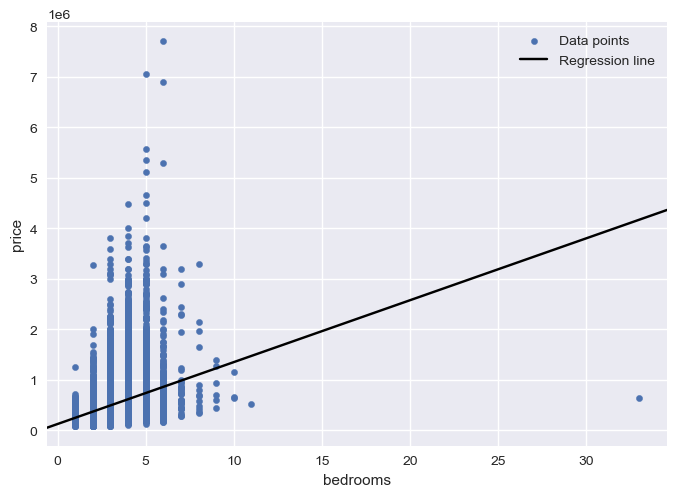

In [57]:
# plotting a regression for simple linear regression.
fig, ax = plt.subplots()
df.plot.scatter(x="bedrooms", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=grade_results, label="Regression line", ax=ax, color="black")
ax.legend();

Multiregression anlysis.

In [58]:
X_second = df[["grade", "bedrooms"]]
X_second

,grade,bedrooms
0,7,3
1,7,3
2,6,2
3,7,4
4,8,3
...,...,...
21592,8,3
21593,8,4
21594,7,2
21595,8,3


In [59]:
second_model = sm.OLS(endog=y, exog=sm.add_constant(X_second))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8901.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:24:07   Log-Likelihood:            -3.0090e+05
No. Observations:               21597   AIC:                         6.018e+05
Df Residuals:                   21594   BIC:                         6.018e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.1e+06   1.25e+04    -88.063      0.0

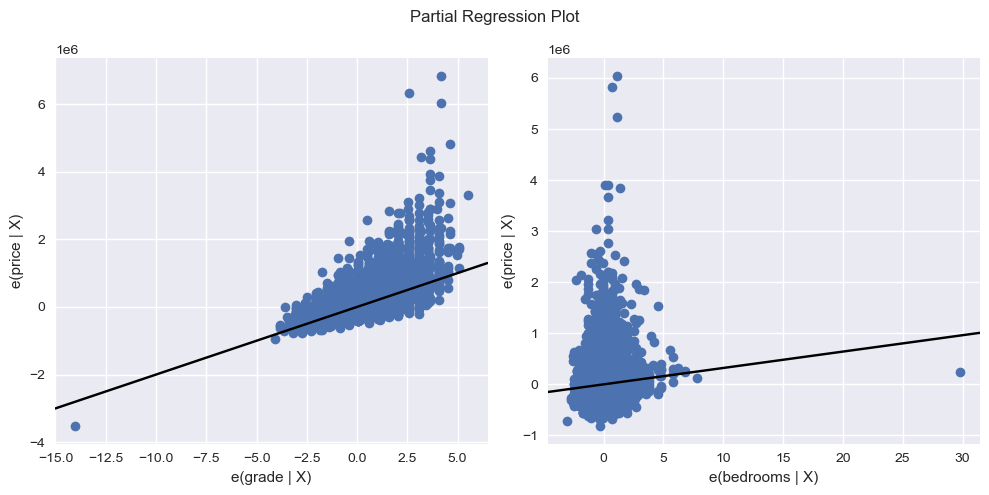

In [60]:
fig = plt.figure(figsize=(10,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["grade", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

In [61]:
X_ohe = df[["grade", "bedrooms","sqft_living"]]
X_dummy =  pd.get_dummies(X_ohe, columns=["grade"], drop_first=True)

In [65]:
X_dummy = X_dummy.apply(pd.to_numeric)
